# Project: Investigate a Dataset - [NICS and U.S. Census Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 

> **Data Sets Used**:  This project consists of two datasets.  One being the FBI's National Instant Criminal Background Check System.  The other being U.S. Census data with several variables on the state level primarily dated from 2016.  The FBI NICS is used by gun shops to perform background checks on potential purchasers of firearms or explosives.  	




### Question(s) and variables for Analysis

><strong>Questions:</strong>
><ul>
><li>What are the strongest positive correlations between total FBI NICS transactions and the Census data as it relates to demographics?</li>
><li>What are the strongest negative correlations between total FBI NICS transactions and the Census data as it relates to demographics?</li>
></ul>
<strong>Dependent and Independent Variables:</strong>
><ul>
><li>The dependent variable will lie within the sum of the total transactions by individual states from within the FBI NICS.</li>
><li>The independent variables will be all individual demographics from within the Census data which shall be used in testing for correlation with the dependent variables.</li>
</ul>

<a id='wrangling'></a>
# Data Wrangling

> Data is uploaded and cleaned to ensure proper transformation towards the applicable data analysis.
Dependent variable data of the FBI NCIS is to be brought down to its core value of total counted transactions by each state.
Independent variable data of the U.S. Census is to be cleaned and maintain all of its data points for further correlation testing. 
In taking this approach, assumptions from within the Independent variables will be left off the table and the truth of the data can lead the way.

In [1]:
# dependencies

import os
import pandas as pd
import numpy as np
import warnings
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set()

> **Upload the data**

In [2]:
# data import
os.chdir(r"C:\Users\randy\OneDrive\Desktop\Udacity\Investigate a Dataset")
df_fbiData = pd.read_csv('Gun_data.csv')
df_censusData = pd.read_csv('Census_data.csv')

In [3]:
## Preview the data
df_censusData.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


The census data is previewed to verify the data cleaning necessary for proper analysis

In [4]:
## Preview the data
df_fbiData.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


The FBI data is previewed to verify the data cleaning necessary for proper analysis.  Comparisons are made between the two data sets.

>**Functions**


In [5]:
## Function to remove special characters
def remove_char(dataframe):
    char_list = ['%',',','"','$']
    for char in char_list:
        for column in dataframe.columns:
            dataframe[column] = dataframe[column].str.replace(char,'')
            
## Function to convert to percent of value            
def percentage(dataframe,column1):
    whole = 'Population estimates, July 1, 2016,  (V2016)'
    dataframe[column1] = round(((dataframe[column1] / dataframe[whole]) * 100),2)        
            
## Function to correct percent columns that are not fully calculated
def percent_clean(f):
    if f < .9:
        return f * 100
    else:
        return f 
    
## Function to calculate the z-scores 
def z_score(dataframe):
    global df_zScore
    df_zScore = dataframe
    for column in dataframe.columns:
        df_zScore[column] = stats.zscore(dataframe[column])  

Functions are created to help with the data cleaning.  These functions are for special characters removal, incomplete percentage calculations, percentage conversions, and data standardization.

> **Clean the Census dataframe:**

In [6]:
# census cleaning

## Remove empty row and set index to desired value
df_censusData.drop(['Fact Note'],axis = 1, inplace=True)
df_censusData.set_index('Fact', inplace = True)

## Drop empty rows 
df_censusData.dropna(axis = 0,thresh = 0.50 * len(df_censusData),inplace = True)

#Transpose the data to allign with the FBI dataframe for index allignment
df_censusData = df_censusData.transpose()
        
## Remove special characters from dataframe               
remove_char(df_censusData)

## Convert dataframe datatype to float and replance NaN values at character locations with 0
df_censusData = df_censusData.apply(pd.to_numeric, errors= 'coerce').fillna(0)

## Apply percent_clean function to entire df_censusData thus correcting all percent values
df_censusData = df_censusData.applymap(percent_clean)

In cleaning this dataset, several items need to be addressed.  First of all, all special characters neeed to be removed in order to parse the data to within a numeric form.  Some entries from within percent of a whole fields are also left uncalculated, this data must be matched accordingly with the rest of the data within the series.  Also, null entries must be properly handled by either removing them in their entirety if they are encompassing the majority of a series, or changing them to a 0 value if not.  The data was then transposed to where the 'state' and other values would allign vertically with the FBI NICS data series.  As previously noted, data is to be left whole for further examination

> **Clean the FBI dataframe:** 

In [7]:
# fbi cleaning 

## Select the data points of interest
df_fbiData = df_fbiData[['state','totals']]

## Sum the monthly total transaction data by state
df_fbiData = df_fbiData.groupby(['state']).sum()

## Rename the totals column to be more explicit
df_fbiData.rename(columns = {'totals':'FBI Gun transaction as % of population'}, inplace = True)

Primarily, the cleaning of this dataset involved trimming it down to two columns in order to create the dependent variable of total transactions.  In doin this, the data was grouped by state so that an overall state value could then be produced.  The 'totals' column was then renamed for more clarity when merging within the U.S. census data.

> **Merge the two datasets:**

In [8]:
## Merge the two datasets

## join the two datasets in a left join to remove the fbi data points for territories that do not exist within the census data
df_combineData = df_censusData.merge(df_fbiData, how='left', left_index=True, right_index=True)

## Function call
percentage(df_combineData,'FBI Gun transaction as % of population')
percentage(df_combineData,'Veterans, 2011-2015')
percentage(df_combineData,'Total employment, 2015')
percentage(df_combineData,'Land area in square miles, 2010')

The two dataframes are merged together to allow for easier joint analysis.  Also, a minority of data series entries are entered as a whole, and not as a percentage of the population as others are.  These entries are calculated as a percentage to allow for better data unification.

In [9]:
df_combineData.head(5)

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,FBI Gun transaction as % of population
Alabama,4863300,4780131,1.7,4779736,6.0,6.4,22.6,23.7,16.1,13.8,51.6,51.5,69.3,26.8,70.0,1.4,10.0,1.6,4.2,65.8,7.47,3.5,2230185,2171853,68.7,125500,1139,345,717,15001,1848325,2.55,85.3,5.2,84.3,23.5,11.8,10.7,58.0,53.0,7576462,26039632,124809759.0,57746565,58564965,12145,24.4,43623,24091,17.1,98540,33.61,67370353,1.9,322025,374153,203604,137630,92219,272651,41943,316984,94.4,1.04,1,137.89
Alaska,741894,710249,4.5,710231,7.3,7.6,25.2,26.4,10.4,7.7,47.7,48.0,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,9.34,7.4,310658,306967,63.4,250000,1827,554,1146,1503,250969,2.81,80.9,16.2,92.1,28.0,8.1,15.5,67.7,65.0,2221335,6375483,0.0,5216303,10474275,14320,19.0,72515,33413,9.9,20907,36.12,15643303,40.0,55521,68032,35402,22141,13688,51147,7953,56091,1.2,76.92,2,153.34
Ar

The combined table is previewed to verify completeness and accuracy.  

<a id='eda'></a>
# Exploratory Data Analysis


In [10]:
## Call function to calculate z-scores       
z_score(df_combineData) 

In [11]:
## Create a correlation dataframe
df_correlations = pd.DataFrame(df_zScore.corrwith(df_zScore['FBI Gun transaction as % of population']),\
                  columns=['Correlations'])
df_correlations.drop(['FBI Gun transaction as % of population','FBI Gun transaction as % of population','FIPS Code'],\
                  inplace = True)

Data is to be standardized, and independent variables calculated as a correlated value of the state totals FBI NICS data set.  This is accomplished through a function call.  Also, a new correlation dataframe is created to store the new correlation values for analysis.  Upon creation, a few more columns are dropped as they are not viable for the upcoming analysis.

>**Correlations are examined within full dataset**

In [12]:
df_correlations.sort_values(by=['Correlations'],ascending=False).head(10)

,Correlations
"With a disability, under age 65 years, percent, 2011-2015",0.443615
"White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)",0.353390
"Persons in poverty, percent",0.289448
"White alone, percent, July 1, 2016, (V2016)",0.273883
"Owner-occupied housing unit rate, 2011-2015",0.261910
"Veterans, 2011-2015",0.157375
"Persons under 18 years, percent, July 1, 2016, (V2016)",0.132894
"Land area in square miles, 2010",0.129407
"Persons under 5 years, percent, July 1, 2016, (V2016)",0.127319
"Persons under 5 years, percent, April 1, 2010",0.113708


The new correlations dataframe is previewed and sorted in descending order for an organized view of the data, which can later be incorporated to within visualizations.

>**Strongest correlations are extracted from the dataset**

In [13]:
## Find the stongest positive correlations
positive_corr = df_correlations[df_correlations["Correlations"] > .25]

## Find the strongest negative correlations
negative_corr = df_correlations[df_correlations["Correlations"] < -.25]

## Concat the positive and negative 
df_correlatedValues = pd.concat([positive_corr,negative_corr]).sort_values(by=['Correlations'],ascending=False)

There are many independent variables within the U.S. Census data set, so they are filtered down to the strongest variables as measured by a correlation value of +-.25 from center, with a scale of -1.0 to 1.0.

>**Visualization of correlation values**

Text(0, 0.5, 'Census Data Variables')

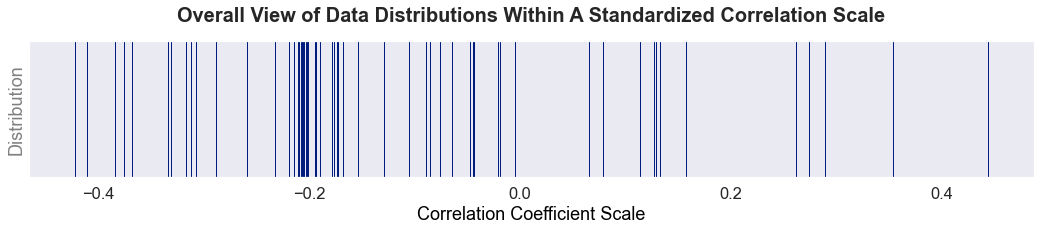

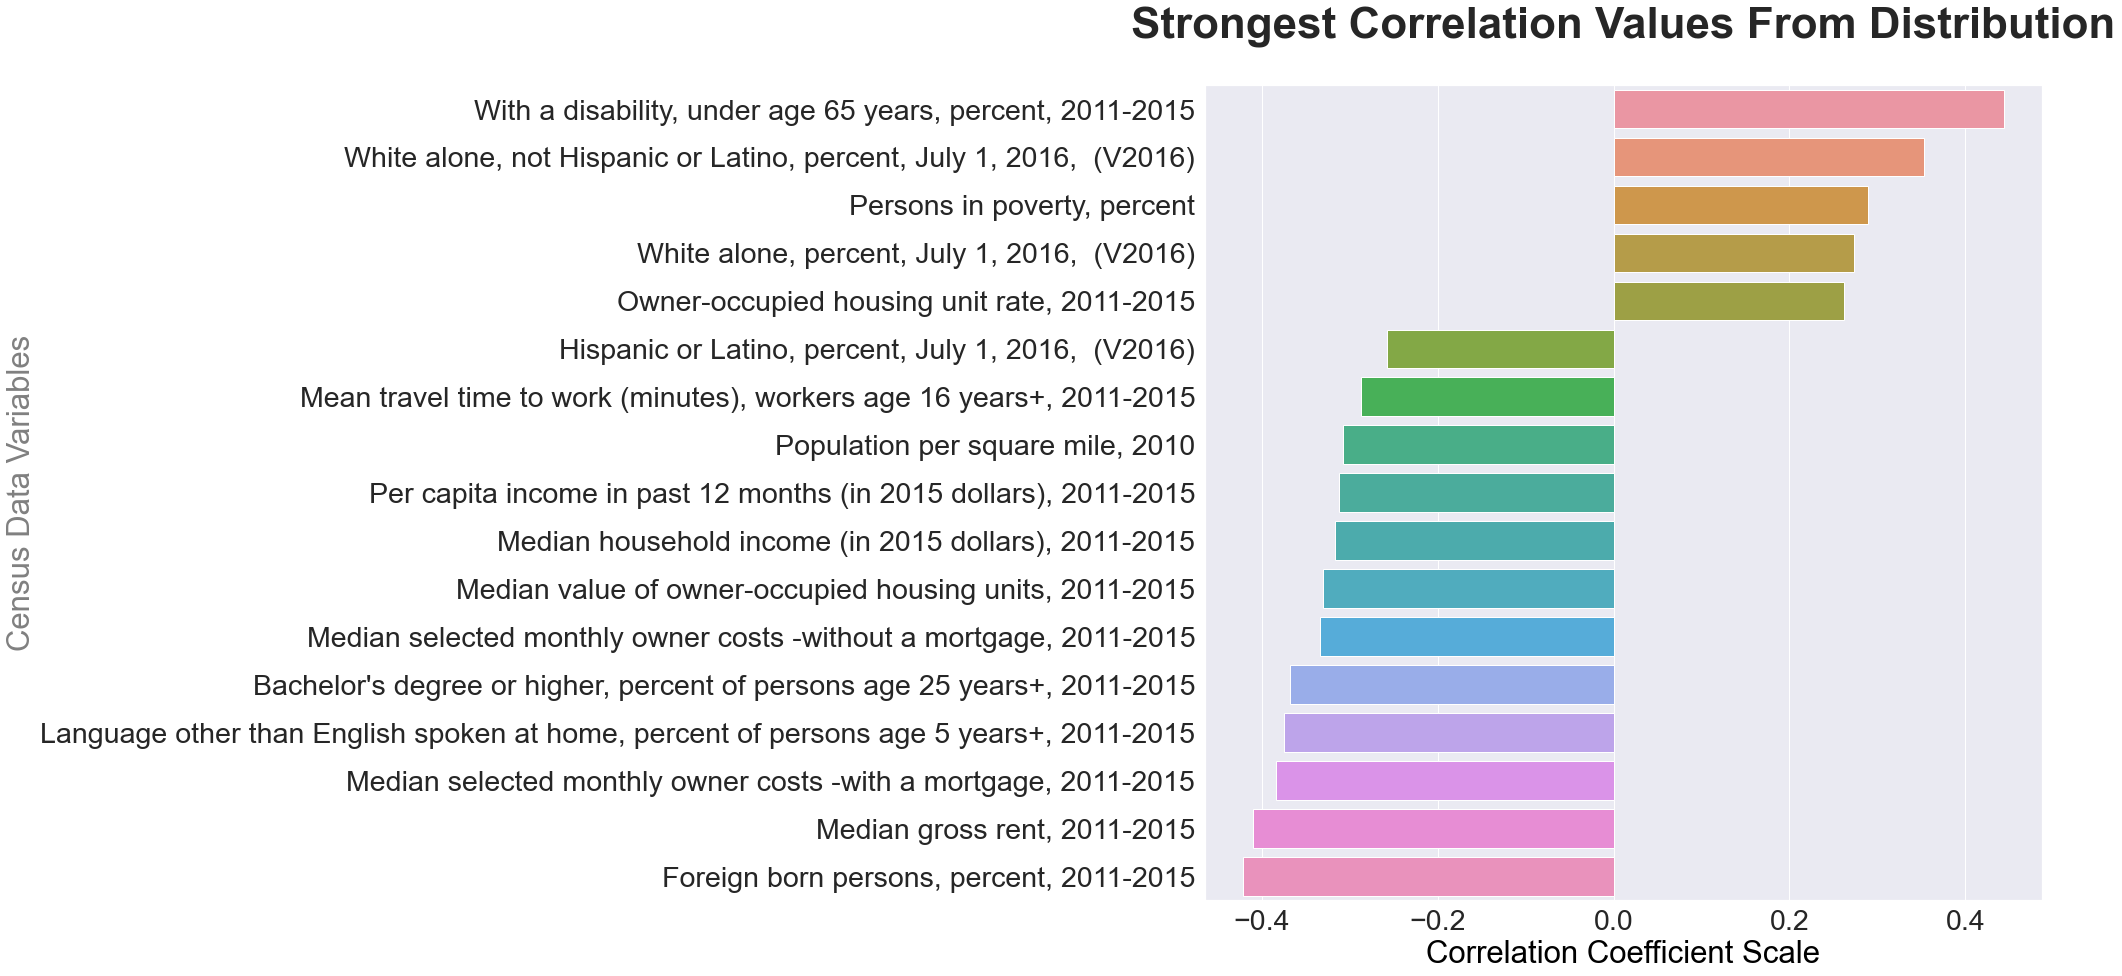

In [14]:
plt.figure(figsize=(18,2.5))
sns.set(font_scale = 1.5)
sns.set_color_codes("dark")
ax = sns.rugplot(data=df_correlations, x="Correlations",height=1.0,color='b')
ax.yaxis.label.set_color('grey') 
ax.xaxis.label.set_color('black')
ax.set_title('Overall View of Data Distributions Within A Standardized Correlation Scale',fontdict= { 'fontsize': 20, 'fontweight':'bold'}, y =1.1)
plt.tick_params(labelleft=False, left=False)
plt.ylabel('Distribution')
plt.xlabel('Correlation Coefficient Scale')
plt.grid(False)

sns.set(font_scale = 5.0)
plt.figure(figsize=(15,15))
sns.set(font_scale = 2.6)
ax = sns.barplot(x = 'Correlations', y = df_correlatedValues.index, data = df_correlatedValues)
ax.yaxis.label.set_color('grey') 
ax.xaxis.label.set_color('black')
ax.set_title('Strongest Correlation Values From Distribution',fontdict= { 'fontsize': 44, 'fontweight':'bold'}, y =1.05)
plt.xlabel('Correlation Coefficient Scale')
plt.ylabel('Census Data Variables')


>Given the amount of independent variables, an overall distribution map is shown above, followed by the strongest correlation values and there given index names.

>**Distribution View:**This view is helpful in obtaining an overall perspective within the general distribution of correlations.  With this perspective, the skew and central tendency of the correlations is apparent.

>**Strongest Correlation Values View:**This view is helpful in narrowing in on some of the potential leading variables within the dataset.  With this, the decision process of which variables to pursue for further statistical research is simplified.

<a id='conclusions'></a>
# Conclusions

><strong>Results:</strong>  The preliminary analysis suggests that:
><ol>
><li>Although further statistical testing is needed to confirm causasion, the distribution of correlations shows a possible interesting link between U.S. demographics and gun ownership.</li>
><li> One of the more interesting data points would be that of gun ownership amongst disabled persons.  In thought, this makes sense purely as a measure of self defense amongst a vulnerable population, but without broad testing, this independent variable would have been left uncovered.
><li>It could also be said that a strong social/economic link exists between the variables by way of monthly expenses.  Further exploration of this link is likely to yield interesting results.
><li>As a negative correlated value, foreign born persons are correlated with less gun ownership.  With further testing this could show a cultural diffence towards the view of gun ownership.
</li>    
</ol>


><strong>Limitations:</strong>  Limitations within this dataset are:
><ol>
><li>The data within these datasets provided a great overview of gun ownership within the United States. In looking towards an approach where a solid hypothesis can be tested, the data should be more current, and more detailed within the state level, to where the independent variables can be studied within the variation that lie within each state.</li>
><li>Although data obtained from the FBI is of great value, it would be appropriate to explore additional sources of data to incorporate to within this research.
</li>    
</ol>

><strong>Next Steps:</strong>
In moving forward, the usage of information found in this dataset is beneficial in narrowing in on a hypothesis towards gun ownership within the United States.  In examining these results, a valid hypothesis would be that gun ownership has a cultural phenomenon within it that lies both within and outside the borders of the United States, and statistically testing states within these cultural differences would be appropriate.